In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:

!kaggle datasets download -d ilhamfp31/kue-indonesia

 97% 293M/303M [00:03<00:00, 113MB/s]
100% 303M/303M [00:03<00:00, 96.6MB/s]


In [11]:
!unzip /content/kue-indonesia.zip -d dataset_directory

Archive:  /content/kue-indonesia.zip
  inflating: dataset_directory/test/kue_dadar_gulung/0.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/1.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/10.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/11.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/12.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/13.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/14.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/15.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/16.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/17.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/18.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/19.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/2.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/3.jpg  
  inflating: dataset_directory/test/kue_dadar_gulung/4.jpg  
  inflating: dataset_directory/test/ku

In [12]:
!unzip /content/kue-indonesia.zip -d kue_dataset

Archive:  /content/kue-indonesia.zip
  inflating: kue_dataset/test/kue_dadar_gulung/0.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/1.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/10.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/11.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/12.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/13.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/14.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/15.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/16.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/17.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/18.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/19.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/2.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/3.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/4.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/5.jpg  
  inflating: kue_dataset/test/kue_dadar_gulung/6.jpg  
  inflating: kue_d

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [14]:
path = '/content/kue_dataset/test'

In [15]:
import os

In [16]:
macam = os.listdir(path)
macam

['kue_lumpur',
 'kue_dadar_gulung',
 'kue_klepon',
 'kue_putri_salju',
 'kue_lapis',
 'kue_kastengel',
 'kue_risoles',
 'kue_serabi']

### Mengatur path dataset menjadi 3 train, val, test

In [17]:
train_dir = '/content/kue_dataset/train'
validation_dir = '/content/kue_dataset/validation'
test_dir = '/content/kue_dataset/test'

### Menggunakan ImageDataGenerator untuk memuat serta melakukan augmentasi pada data

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

### Split dataset menjadi train, val, dan test

* TRAIN

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1516 images belonging to 8 classes.


* TEST

In [21]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 160 images belonging to 8 classes.


* Validation

In [22]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 160 images belonging to 8 classes.


### Membuat model sequential

In [23]:
model = Sequential()

### Menggunakan pre-trained model VGG16

In [24]:
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
base_model.trainable = False

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

58889256/58889256 [==============================] - 0s 0us/step


### Menggunakan optimizer, loss, dan metrics

In [25]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Callbacks

In [26]:
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=3)

### Latih Model

In [27]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
48/48 [==============================] - 34s 465ms/step - loss: -879.8755 - accuracy: 0.1201 - val_loss: -2317.3047 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 2/5
48/48 [==============================] - 22s 466ms/step - loss: -4692.4058 - accuracy: 0.1194 - val_loss: -7925.2485 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/5
48/48 [==============================] - 21s 443ms/step - loss: -12240.9463 - accuracy: 0.1194 - val_loss: -17569.8398 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 4/5
48/48 [==============================] - 21s 444ms/step - loss: -23911.0957 - accuracy: 0.1194 - val_loss: -31636.1309 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 5/5
48/48 [==============================] - 21s 445ms/step - loss: -39698.3281 - accuracy: 0.1194 - val_loss: -49759.3359 - val_accuracy: 0.1250 - lr: 0.0010


### Evaluasi model

In [28]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Akurasi pada data test: {test_accuracy:.2f}')

5/5 [==============================] - 2s 327ms/step - loss: -48273.3672 - accuracy: 0.1375
Akurasi pada data test: 0.14


### Membuat grafik pergerakan metrik Accuracy dan Loss terhadap epoch pada Training dan Validation

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

### Grafik Accuracy

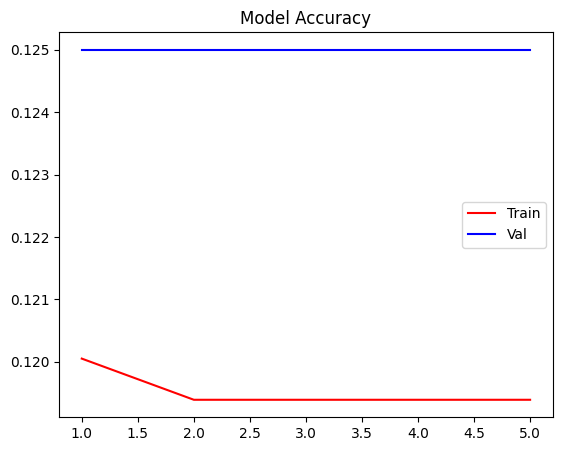

In [30]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Train')
plt.plot(epochs, val_acc, 'b', label='Val')
plt.title('Model Accuracy')
plt.legend()

### Grafik Loss

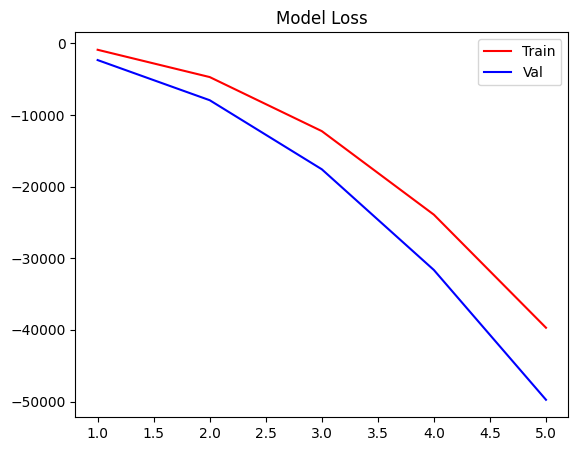

In [31]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Train')
plt.plot(epochs, val_loss, 'b', label='Val')
plt.title('Model Loss')
plt.legend()

plt.show()

In [32]:
from tensorflow.image import random_brightness
from tensorflow.keras.utils import load_img

In [33]:
path_gambar = '/content/kue_dataset/test/kue_dadar_gulung/0.jpg'

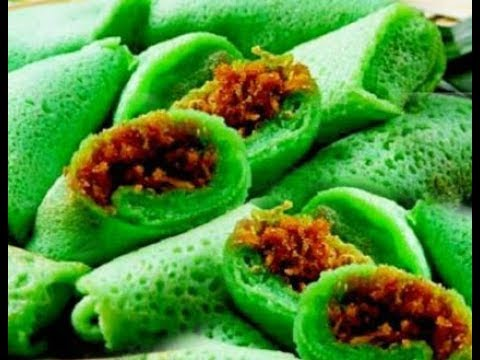

In [34]:
image = load_img(path_gambar)
image

In [35]:
bright = random_brightness(image, max_delta=5)

Text(0.5, 1.0, 'gambar sebelum argumentasi')

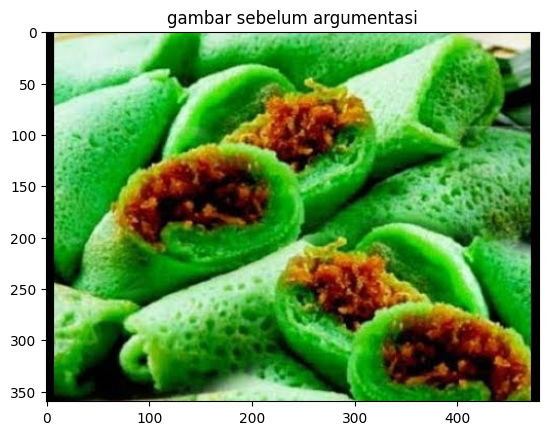

In [36]:
plt.imshow(image)
plt.title('gambar sebelum argumentasi')